c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Confusion Matrix:
[[79 24]
 [33 38]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.77      0.73       103
           1       0.61      0.54      0.57        71

    accuracy                           0.67       174
   macro avg       0.66      0.65      0.65       174
weighted avg       0.67      0.67      0.67       174



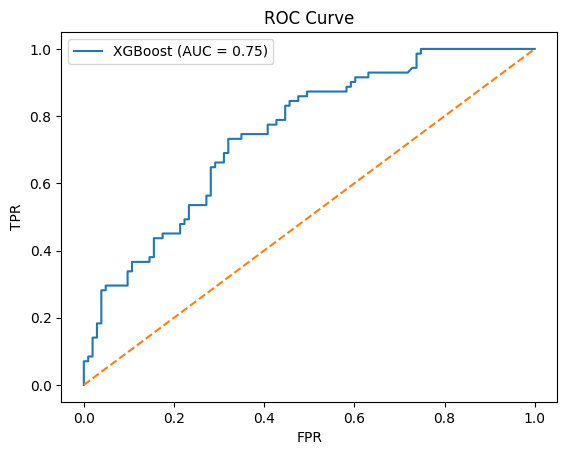

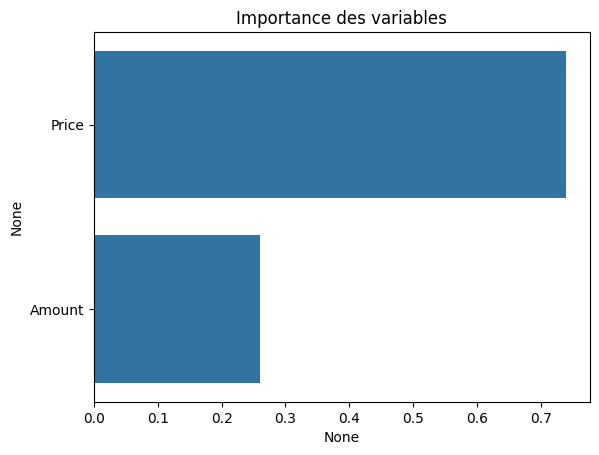

c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy moyenne (cross-validation): 0.7179760119940031


c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [2]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import joblib

# Connexion
server = 'DESKTOP-6NBPH33'
database = 'DW_Finance'
username = 'rana'
password = 'rana'

connection_string = f'mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server'
engine = create_engine(connection_string)

# Requête
query = """
SELECT 
    Price,              -- Prix unitaire
    Amount,             -- Montant total payé
    DiscountOffered,    -- Remise offerte
    RecommendedProfitMargin, -- Marge recommandée
    DATEDIFF(DAY, Fk_DueDate, Fk_PaymentDate) AS payment_duration -- Délai de paiement
FROM [dbo].[Fact_Purchase]
"""

data = pd.read_sql(query, engine)

# Création de la cible basée sur une logique métier
data['IsReliable'] = ((data['DiscountOffered'] > 5) & 
                      (data['payment_duration'] < 30) & 
                      (data['RecommendedProfitMargin'] > 15)).astype(int)

# Sélection des variables explicatives
# Ici on confirme que Amount est un montant (€), pas une quantité
features = ['Price', 'Amount']  # Price = prix unitaire, Amount = montant payé
X = data[features]
y = data['IsReliable']

# Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Modèle XGBoost
model = xgb.XGBClassifier(
    random_state=42,
    eval_metric='logloss',  
    use_label_encoder=False
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Évaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# AUC ROC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Importance des variables
feature_importances = pd.Series(model.feature_importances_, index=features)
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Importance des variables')
plt.show()

# Cross-validation
scores = cross_val_score(model, X_scaled, y, cv=5)
print("Accuracy moyenne (cross-validation):", scores.mean())



Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=100, reg_alpha=1, reg_lambda=0, subsample=1.0; total time=   0.0s


c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=100, reg_alpha=1, reg_lambda=0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=100, reg_alpha=1, reg_lambda=0, subsample=1.0; total time=   0.1s


c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=100, reg_alpha=1, reg_lambda=0, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=10, n_estimators=100, reg_alpha=1, reg_lambda=0, subsample=1.0; total time=   0.1s


c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=190, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.1s


c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=190, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=190, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.1s


c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=190, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=190, reg_alpha=0.5, reg_lambda=1, subsample=1.0; total time=   0.0s


c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, n_estimators=80, reg_alpha=0.5, reg_lambda=0.1, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, n_estimators=80, reg_alpha=0.5, reg_lambda=0.1, subsample=0.9; total time=   0.0s


c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, n_estimators=80, reg_alpha=0.5, reg_lambda=0.1, subsample=0.9; total time=   0.0s


c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, n_estimators=80, reg_alpha=0.5, reg_lambda=0.1, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, n_estimators=80, reg_alpha=0.5, reg_lambda=0.1, subsample=0.9; total time=   0.0s


c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=11, n_estimators=190, reg_alpha=0.5, reg_lambda=0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=11, n_estimators=190, reg_alpha=0.5, reg_lambda=0, subsample=1.0; total time=   0.0s


c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=11, n_estimators=190, reg_alpha=0.5, reg_lambda=0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=11, n_estimators=190, reg_alpha=0.5, reg_lambda=0, subsample=1.0; total time=   0.0s


c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.2, max_depth=11, n_estimators=190, reg_alpha=0.5, reg_lambda=0, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=120, reg_alpha=0.1, reg_lambda=1, subsample=1.0; total time=   0.1s


c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=120, reg_alpha=0.1, reg_lambda=1, subsample=1.0; total time=   0.1s


c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=120, reg_alpha=0.1, reg_lambda=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=120, reg_alpha=0.1, reg_lambda=1, subsample=1.0; total time=   0.1s


c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=7, n_estimators=120, reg_alpha=0.1, reg_lambda=1, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=70, reg_alpha=0.1, reg_lambda=0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=70, reg_alpha=0.1, reg_lambda=0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=70, reg_alpha=0.1, reg_lambda=0, subsample=0.8; total time=   0.0s


c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:33] WARNING: C:\actions-runne

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=70, reg_alpha=0.1, reg_lambda=0, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=70, reg_alpha=0.1, reg_lambda=0, subsample=0.8; total time=   0.0s


c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=160, reg_alpha=0, reg_lambda=0.1, subsample=0.9; total time=   0.1s


c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=160, reg_alpha=0, reg_lambda=0.1, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=160, reg_alpha=0, reg_lambda=0.1, subsample=0.9; total time=   0.1s


c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=160, reg_alpha=0, reg_lambda=0.1, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=160, reg_alpha=0, reg_lambda=0.1, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=7, n_estimators=80, reg_alpha=0.1, reg_lambda=1, subsample=0.9; total time=   0.0s


c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=7, n_estimators=80, reg_alpha=0.1, reg_lambda=1, subsample=0.9; total time=   0.0s


c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=7, n_estimators=80, reg_alpha=0.1, reg_lambda=1, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=7, n_estimators=80, reg_alpha=0.1, reg_lambda=1, subsample=0.9; total time=   0.1s


c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=7, n_estimators=80, reg_alpha=0.1, reg_lambda=1, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, n_estimators=160, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.0s


c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, n_estimators=160, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, n_estimators=160, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.1s


c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, n_estimators=160, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=4, n_estimators=160, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.0s


c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=120, reg_alpha=1, reg_lambda=0.5, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=120, reg_alpha=1, reg_lambda=0.5, subsample=0.8; total time=   0.1s


c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=120, reg_alpha=1, reg_lambda=0.5, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=120, reg_alpha=1, reg_lambda=0.5, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.05, max_depth=7, n_estimators=120, reg_alpha=1, reg_lambda=0.5, subsample=0.8; total time=   0.1s
Meilleurs hyperparamètres : {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': np.int64(160), 'max_depth': np.int64(4), 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.8}
Confusion Matrix:
[[80 23]
 [37 34]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.78      0.73       103
           1       0.60      0.48      0.53        71

    accuracy                           0.66       174
   macro avg       0.64      0.63      0.63       174


c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


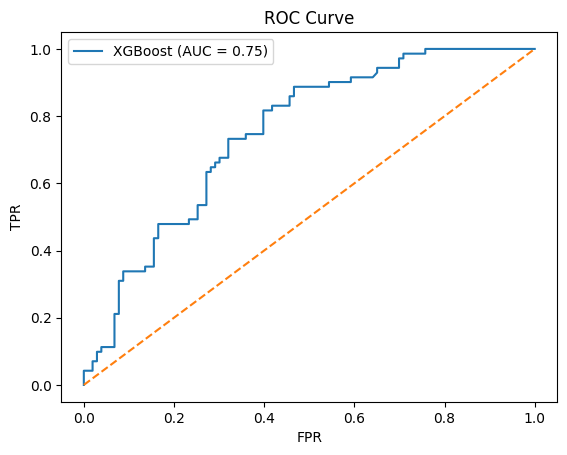

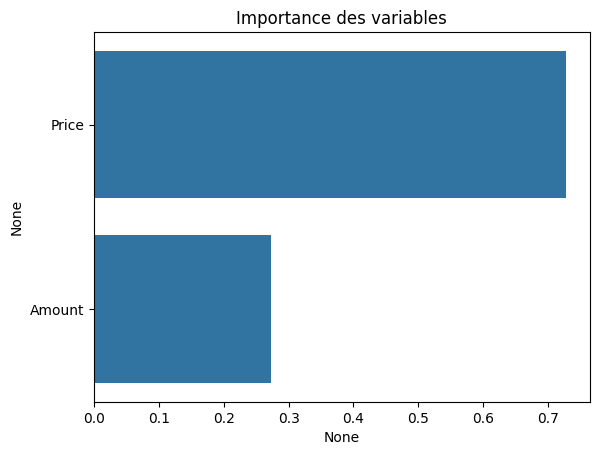

c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:15:37] WARNING: C:\actions-runne

Accuracy moyenne (cross-validation): 0.7023388305847076


In [3]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import joblib
import numpy as np

# Connexion à la base de données
server = 'DESKTOP-6NBPH33'
database = 'DW_Finance'
username = 'rana'
password = 'rana'

connection_string = f'mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server'
engine = create_engine(connection_string)

# Requête SQL pour obtenir les données
query = """
SELECT 
    Price,              -- Prix unitaire
    Amount,             -- Montant total payé
    DiscountOffered,    -- Remise offerte
    RecommendedProfitMargin, -- Marge recommandée
    DATEDIFF(DAY, Fk_DueDate, Fk_PaymentDate) AS payment_duration -- Délai de paiement
FROM [dbo].[Fact_Purchase]
"""

data = pd.read_sql(query, engine)

# Création de la cible basée sur une logique métier
data['IsReliable'] = ((data['DiscountOffered'] > 5) & 
                      (data['payment_duration'] < 30) & 
                      (data['RecommendedProfitMargin'] > 15)).astype(int)

# Sélection des variables explicatives
features = ['Price', 'Amount']  # Price = prix unitaire, Amount = montant payé
X = data[features]
y = data['IsReliable']

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Paramètres à tester pour le RandomizedSearch
param_dist = {
    'n_estimators': np.arange(50, 200, 10),  # Nombre d'arbres
    'max_depth': np.arange(3, 12, 1),         # Profondeur des arbres
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Taux d'apprentissage
    'subsample': [0.8, 0.9, 1.0],             # Proportion des données à échantillonner
    'colsample_bytree': [0.6, 0.8, 1.0],      # Proportion des colonnes à échantillonner par arbre
    'gamma': [0, 0.1, 0.2, 0.3],              # Contrôle de la complexité des arbres
    'reg_alpha': [0, 0.1, 0.5, 1],            # L2 regularization
    'reg_lambda': [0, 0.1, 0.5, 1],           # L1 regularization
}

# Création du modèle XGBoost
model = xgb.XGBClassifier(
    random_state=42,
    eval_metric='logloss',  # évite un warning
    use_label_encoder=False
)

# Initialisation du RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,  # Nombre d'itérations (combinaisons à tester)
    cv=5,       # Validation croisée (5 folds)
    scoring='accuracy',  # Critère de performance
    random_state=42,
    n_jobs=1,  # Utiliser tous les cœurs du processeur
    verbose=2    # Afficher les progrès
)

# Exécution du RandomizedSearch
random_search.fit(X_train, y_train)

# Affichage des meilleurs hyperparamètres
print(f"Meilleurs hyperparamètres : {random_search.best_params_}")

# Meilleur modèle après l'optimisation
best_model = random_search.best_estimator_

# Prédictions sur l'ensemble de test
y_pred = best_model.predict(X_test)

# Matrice de confusion
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Rapport de classification
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# AUC ROC
y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Importance des variables
feature_importances = pd.Series(best_model.feature_importances_, index=features)
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Importance des variables')
plt.show()

# Cross-validation avec le meilleur modèle
scores = cross_val_score(best_model, X_scaled, y, cv=5)
print("Accuracy moyenne (cross-validation):", scores.mean())


In [9]:
# ------------------------------------------------------
# Partie Test : prédire sur de nouvelles valeurs
# ------------------------------------------------------

# Exemple de nouvelle observation
new_data = pd.DataFrame({
    'Price': [0],    # Prix unitaire (€)
    'Amount': [0]   # Montant total payé (€)
})

# Normalisation avec le même scaler que celui utilisé pour l'entraînement
new_data_scaled = scaler.transform(new_data)

# Prédiction
new_pred = best_model.predict(new_data_scaled)

# Affichage du résultat
if new_pred[0] == 1:
    print("=> Le fournisseur est fiable.")
else:
    print("=> Le fournisseur n'est pas fiable.")


=> Le fournisseur est fiable.
